In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from xgboost import XGBClassifier
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import tracemalloc
from time import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import seaborn as sns
from yellowbrick.classifier import ROCAUC
import pydotplus
from IPython.display import Image

In [69]:
#import the csv file
df = pd.read_csv('star_classification.csv', index_col=None, header=0) 
df1 = df


In [70]:
#Check for missing data
import missingno as msno
%matplotlib inline
msno.matrix(df)

<AxesSubplot:>

## select the features





In [4]:
#find the outliers 
df1.describe().T.style.background_gradient()

In [5]:
import seaborn as sns
df1.loc[df['class'] == 'GALAXY','class'] = 0
df1.loc[df['class'] == 'STAR','class'] = 1
df1.loc[df['class'] == 'QSO','class'] = 2
df1['class'] = df1['class'].astype('int')
corr = df1.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot = True,fmt= '.2f')
plt.show()

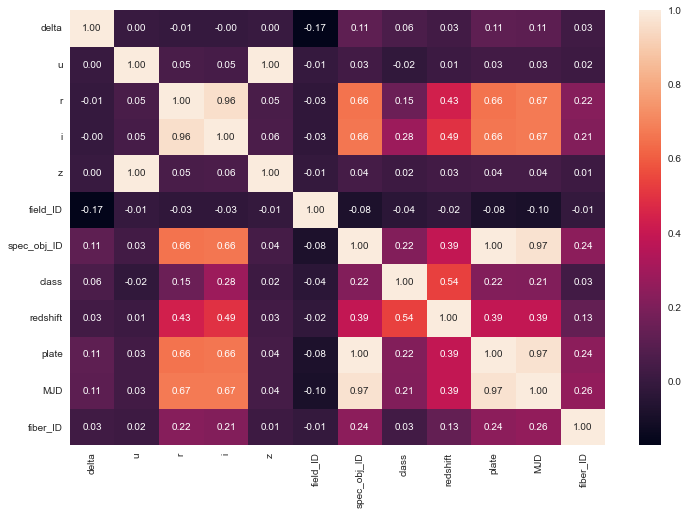

In [6]:
#delete features we do not need
df = pd.read_csv('star_classification.csv', index_col=None, header=0)
df.loc[df['class'] == 'GALAXY','class'] = 0
df.loc[df['class'] == 'STAR','class'] = 1
df.loc[df['class'] == 'QSO','class'] = 2
df['class'] = df['class'].astype('int')
df =  df.drop('g',axis = 1)
df =  df.drop('run_ID', axis = 1)
df =  df.drop('obj_ID', axis = 1)
df =  df.drop('alpha', axis = 1)
df =  df.drop('cam_col', axis = 1)
df =  df.drop('rerun_ID', axis = 1)
corr2 = df.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr2,annot = True,fmt= '.2f')
plt.show()

## balance the data





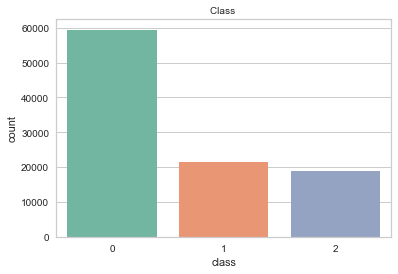

In [7]:
# number the class and observe their data status
df.loc[df['class'] == 'GALAXY','class'] = 0
df.loc[df['class'] == 'STAR','class'] = 1
df.loc[df['class'] == 'QSO','class'] = 2
df['class'] = df['class'].astype('int')
sns.countplot(x = df["class"], palette="Set2")
plt.title("Class ",fontsize=10)
plt.show()    

    


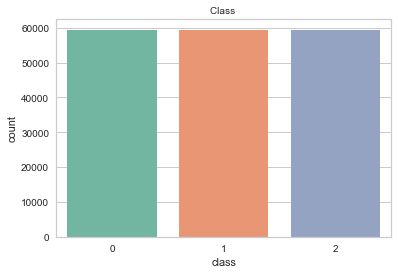

In [8]:
#Use the smoke method to balance the data
from imblearn.over_sampling import SMOTE
x = df.drop(['class'], axis = 1)
y = df['class']
sm = SMOTE(random_state=0)
x, y = sm.fit_resample(x, y)
sns.countplot(x = y, palette="Set2")
plt.title("Class ",fontsize=10)
plt.show()  

## scale the data and split the data





In [9]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
#split the data
X_tval,x_test,y_tval,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)
x_train,X_val,y_train,y_val = train_test_split(X_tval,y_tval,test_size = 0.25, random_state=1)

#Converting data formats to train nn model
one_hot_train_labels = to_categorical(y_train)
one_hot_val_labels = to_categorical(y_val)

## neural network model





In [10]:
def create_model(optimizer):
    lossValue = tf.keras.losses.CategoricalCrossentropy()
    model = Sequential()
    model.add(Dense(29, input_dim=11, ))
    model.add(Dense(19, activation='tanh'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer = optimizer,loss = lossValue, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
rf_params ={
    'optimizer':['ADAM','SGD','RMSProp'],
    'batch_size':[5,10,15],
    'epochs':[10,50,100]
}
#record time and memory
tracemalloc.start()
t = time()
grid = GridSearchCV(estimator=model, param_grid = rf_params, n_jobs=-1)
grid_result = grid.fit(X_val, one_hot_val_labels)
print ("training time is  :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(grid_result.best_params_)

training time is  : 3195.536 s
Current memory usage is 6.403881 MB,  Peak was 6.952494 MB
{'batch_size': 5, 'epochs': 100, 'optimizer': 'SGD'}


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 29)                348       
_________________________________________________________________
dense_7 (Dense)              (None, 19)                570       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 60        
Total params: 978
Trainable params: 978
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
21401/21401 [==============================] - 13s 585us/step - loss: 0.2036 - accuracy: 0.9305
Epoch 2/100
21401/21401 [==============================] - 12s 584us/step - loss: 0.1312 - accuracy: 0.9570
Epoch 3/100
21401/21401 [==============================] - 12s 581us/step - loss: 0.1199 - accuracy: 0.9612
Epoch 4/100
21401/21401 [==============================] 

Text(0, 0.5, 'loss_value')

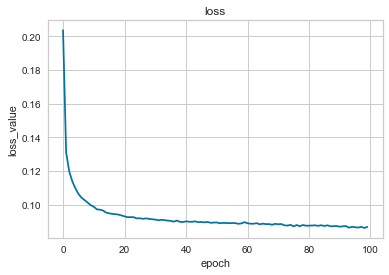

In [42]:
#record time and memory
tracemalloc.start()
t = time()
model = Sequential()
model.add(Dense(29, input_dim=11, ))
model.add(Dense(19, activation='tanh'))
model.add(Dense(3, activation='softmax'))
lossValue = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer ='SGD', loss = lossValue, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train, one_hot_train_labels, batch_size =5,epochs = 100)
print ("training time is  :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss_value')

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True)

In [44]:
pred_nn = model.predict(x_test)
pred_nn1 = np.around(pred_nn)
pred_nn2 = np.empty(len(pred_nn1))
for i in range(len(pred_nn1)):
    if pred_nn1[i][0] ==  1:
        pred_nn2[i] = 0
    elif pred_nn1[i][1] ==  1:
        pred_nn2[i] = 1
    else:
        pred_nn2[i] = 2
print(classification_report(y_test, pred_nn2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11846
           1       0.99      1.00      0.99     11975
           2       0.98      0.96      0.97     11846

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



## SVM model





In [14]:
#record time and memory
tracemalloc.start()
t = time()
rf_params = {
    'C': [1,10,100],
    'kernel':['poly','rbf','sigmoid'],
#    'epsilon':[0.01,0.1,1]
}
clf = svm.SVC()
grid = GridSearchCV(clf,rf_params,cv = 2,scoring = 'accuracy')
grid.fit(X_val,y_val)
print ("training time is :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(grid.best_params_)

training time is : 162.302 s
Current memory usage is 0.710983 MB,  Peak was 5.987013 MB
{'C': 100, 'kernel': 'rbf'}


In [74]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
import tracemalloc
from time import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
#record time and memory
tracemalloc.start()
svc = svm.SVC(kernel='rbf', C=100)
svc = OneVsRestClassifier(svc)
tracemalloc.start()
t = time()
svc = svc.fit(X_val,y_val)
print ("fit time is :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()


t = time()
model = Sequential()
predicted1 = svc.predict(x_test)
print ("predict time is :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(classification_report(y_test, predicted1))


fit time is : 37.049 s
Current memory usage is 1.160239 MB,  Peak was 4.93623 MB
predict time is : 18.201 s
Current memory usage is 0.0 MB,  Peak was 0.0 MB
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11846
           1       0.98      1.00      0.99     11975
           2       0.98      0.95      0.96     11846

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



In [16]:
visualizer_svc = ROCAUC(svc , classes= ['0', '1', '2'])
visualizer_svc.fit(x_train, y_train)        
visualizer_svc.score(x_test, y_test)        
visualizer_svc.show()

<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

## KNN MODEL




In [17]:
#record time and memory
tracemalloc.start()
t = time()
rf_params ={
    'n_neighbors' : [1,2,3,4,5,6],
    'algorithm' :  ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform','distance'],
    'p' : [1,2]
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf,rf_params,cv = 4,scoring = 'accuracy')
grid.fit(X_val,y_val)
print ("training time is :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(grid.best_params_)

training time is : 533.495 s
Current memory usage is 1.372163 MB,  Peak was 2152.932351 MB
{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [75]:
#record time and memory
tracemalloc.start()
t = time()
knn = KNeighborsClassifier(n_neighbors = 6,weights = 'distance',p = 1)
knn.fit(x_train, y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")




tracemalloc.start()
t = time()
predicted = knn.predict(x_test)
print(classification_report(y_test, predicted))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 0.132 s
Current memory usage is 2.440293 MB,  Peak was 3.898568 MB
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11846
           1       0.94      0.97      0.96     11975
           2       0.98      0.95      0.96     11846

    accuracy                           0.95     35667
   macro avg       0.95      0.95      0.95     35667
weighted avg       0.95      0.95      0.95     35667

predict time : 3.363 s
Current memory usage is 2.591443 MB,  Peak was 13.075371 MB


In [19]:
visualizer_knn  = ROCAUC(knn , classes= ['0', '1', '2'])
visualizer_knn.fit(x_train, y_train)        
visualizer_knn.score(x_test, y_test)        
visualizer_knn.show()

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

## LogisticRegression(choose parameters manually)





In [77]:
tracemalloc.start()
t = time()
log_reg1 = LogisticRegression(max_iter = 10000, C = 1000, penalty = 'l2')
log_reg1 = OneVsRestClassifier(log_reg1)
log_reg1.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")



tracemalloc.start()
t = time()
predicted2 = log_reg1.predict(x_test)
print(classification_report(y_test, predicted2))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 1.599 s
Current memory usage is 5.473907 MB,  Peak was 10.600958 MB
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     11846
           1       0.99      1.00      0.99     11975
           2       0.94      0.96      0.95     11846

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667

predict time : 0.039 s
Current memory usage is 5.618693 MB,  Peak was 10.600958 MB


In [76]:
tracemalloc.start()
t = time()
log_reg2 = LogisticRegression(max_iter = 10000, C = 100, penalty = 'l2')
log_reg2 = OneVsRestClassifier(log_reg2)
log_reg2.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")

tracemalloc.start()
t = time()
predicted2 = log_reg2.predict(x_test)
print(classification_report(y_test, predicted2))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 1.63 s
Current memory usage is 2.041392 MB,  Peak was 8.880737 MB
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     11846
           1       0.99      1.00      0.99     11975
           2       0.94      0.96      0.95     11846

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667

predict time : 0.039 s
Current memory usage is 2.186177 MB,  Peak was 8.880737 MB


In [72]:
tracemalloc.start()
t = time()
log_reg3 = LogisticRegression(max_iter = 10000, C = 1, penalty = 'l2')
log_reg3 = OneVsRestClassifier(log_reg3)
log_reg3.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()




tracemalloc.start()
t = time()
predicted2 = log_reg3.predict(x_test)
print(classification_report(y_test, predicted2))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 1.045 s
Current memory usage is 5.476495 MB,  Peak was 10.603546 MB
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     11846
           1       0.96      0.99      0.98     11975
           2       0.94      0.96      0.95     11846

    accuracy                           0.95     35667
   macro avg       0.95      0.95      0.95     35667
weighted avg       0.95      0.95      0.95     35667

predict time : 0.042 s
Current memory usage is 0.295096 MB,  Peak was 1.434234 MB


In [73]:
tracemalloc.start()
t = time()
log_reg4 = LogisticRegression(max_iter = 10000,penalty = 'none')
log_reg4 = OneVsRestClassifier(log_reg4)
log_reg4.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()



tracemalloc.start()
t = time()
predicted2 = log_reg4.predict(x_test)
print(classification_report(y_test, predicted2))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 1.798 s
Current memory usage is 2.038925 MB,  Peak was 8.882913 MB
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     11846
           1       0.99      1.00      0.99     11975
           2       0.94      0.96      0.95     11846

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667

predict time : 0.041 s
Current memory usage is 0.295096 MB,  Peak was 1.434234 MB


In [24]:
#the model we choose is log_reg3
visualizer_log = ROCAUC(log_reg3, classes= ['0', '1', '2'])
visualizer_log.fit(x_train, y_train)        
visualizer_log.score(x_test, y_test)        
visualizer_log.show()

<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

## Decision tree





In [25]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(10,100 ,num = 10)]
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,4]
max_features = ['auto','sqrt']
criterion  =  ['entropy', 'gini']
splitter = ['best','random']
rf_params = {
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf' :min_samples_leaf,
    'splitter' :splitter,
    'max_features' :max_features
}
n_iter_search = 10
#record time and memory
tracemalloc.start()
t = time()
clf = DecisionTreeClassifier()
Random = RandomizedSearchCV(clf,param_distributions = rf_params, n_iter = n_iter_search,cv = 6,scoring = 'accuracy')
Random.fit(X_val,y_val)
print ("training time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(Random.best_params_)

training time : 3.112 s
memory usage is 0.358519 MB,  Peak was 7.28564 MB
{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'gini'}


In [78]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
tracemalloc.start()
t = time()
model_Dtree = DecisionTreeClassifier(criterion = 'entropy',splitter = 'best',min_samples_split  = 2,min_samples_leaf = 4,max_features = 'auto',max_depth =  30 )
model_Dtree.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")



tracemalloc.start()
t = time()
pred1 = model_Dtree.predict(x_test)
print(classification_report(y_test, pred1))
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 0.388 s
Current memory usage is 0.299936 MB,  Peak was 9.034372 MB
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11846
           1       0.99      0.99      0.99     11975
           2       0.96      0.95      0.95     11846

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667

fit time : 0.036 s
Current memory usage is 0.445962 MB,  Peak was 9.034372 MB


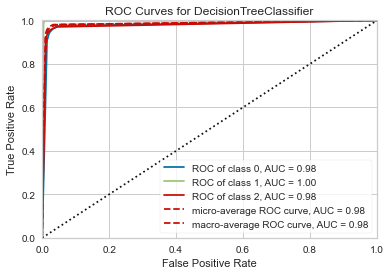

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
#ROC_curve
model_Dtree = DecisionTreeClassifier(criterion = 'entropy',splitter = 'best',min_samples_split  = 2,min_samples_leaf = 4,max_features = 'auto',max_depth =  30 )
visualizer = ROCAUC(model_Dtree, classes= ['0', '1', '2'])
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()  

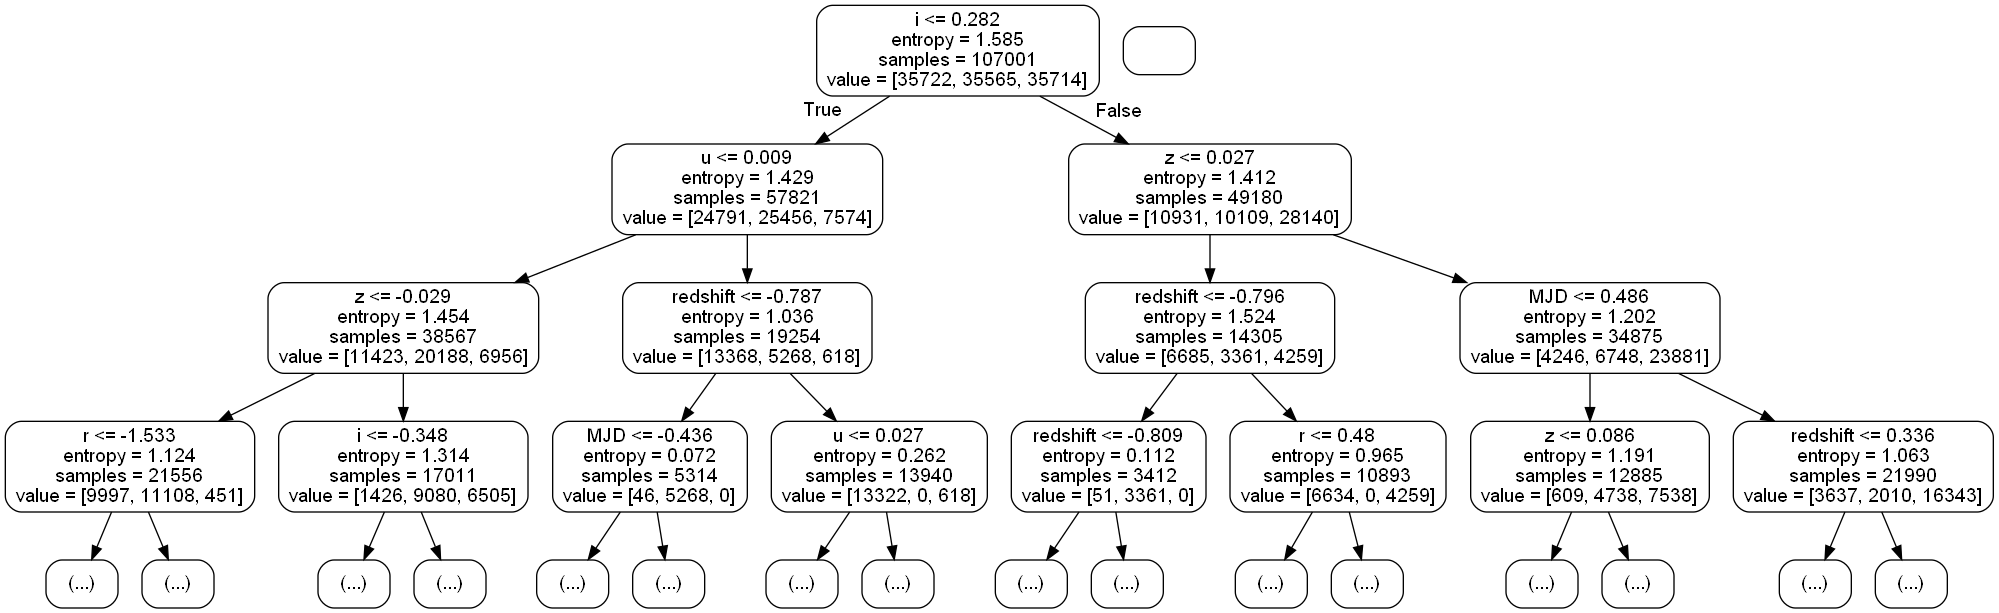

In [28]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = export_graphviz(model_Dtree, out_file=None, max_depth=3,rounded = True,feature_names=['delta','u','r','i','z','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

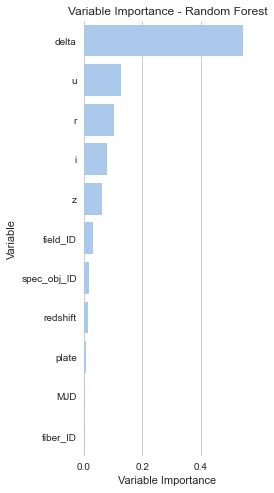

In [29]:
importances = model_Dtree.feature_importances_
indices = np.argsort(importances)[::-1] 
f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=['delta','u','r','i','z','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'],x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

## Random Forest





In [30]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(10,100 ,num = 10)]
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,4]
max_features = ['auto','sqrt']
criterion  =  ['entropy', 'gini']
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num  = 10)]
bootstrap = [True, False]

rf_params = {
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf' :min_samples_leaf,
    'max_features' :max_features,
    'n_estimators' :n_estimators,
    'bootstrap' : bootstrap
}
n_iter_search = 10
# Record time and memory
tracemalloc.start()
t = time()
clf = RandomForestClassifier()
Random = RandomizedSearchCV(clf,param_distributions = rf_params, n_iter = n_iter_search,cv = 5,scoring = 'accuracy')
Random.fit(X_val,y_val)
print ("training time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(Random.best_params_)

training time : 1679.802 s
Current memory usage is 0.684819 MB,  Peak was 8.97693 MB
{'n_estimators': 445, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True}


In [79]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
tracemalloc.start()
t = time()
model_Rtree = RandomForestClassifier(n_estimators = 445, min_samples_split = 6, min_samples_leaf =  1, max_features=  'auto', max_depth = 60, criterion = 'entropy',bootstrap =  True)
model_Rtree.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")

tracemalloc.start()
t = time()
pred2 = model_Rtree.predict(x_test)
print(classification_report(y_test, pred2))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 107.189 s
Current memory usage is 0.567501 MB,  Peak was 13.69485 MB
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11846
           1       1.00      1.00      1.00     11975
           2       0.98      0.97      0.97     11846

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667

predict time : 1.659 s
Current memory usage is 0.716846 MB,  Peak was 13.69485 MB


In [46]:
visualizer_Rtree = ROCAUC(model_Rtree, classes= ['0', '1', '2'])
visualizer_Rtree.fit(x_train, y_train)        
visualizer_Rtree.score(x_test, y_test)        
visualizer_Rtree.show()  

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

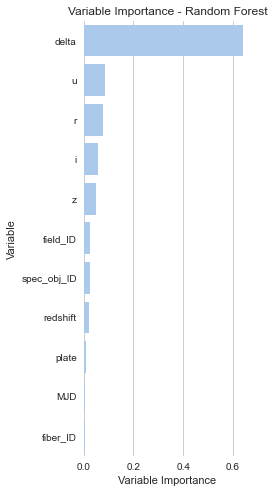

In [47]:
importances = model_Rtree.feature_importances_
indices = np.argsort(importances)[::-1] 
f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=['delta','u','r','i','z','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'],x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

## XGBoost




In [34]:
#record time and memory
tracemalloc.start()
t = time()
max_depth = [int(x) for x in np.linspace(10,100 ,num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num  = 10)]
rf_params = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "learning_rate": stats.uniform(0.05, 0.4),
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
}
n_iter_search = 10
clf =  XGBClassifier()
Random = RandomizedSearchCV(clf,param_distributions = rf_params, n_iter = n_iter_search,cv = 5,scoring = 'accuracy')
Random.fit(X_val,y_val)
print ("training time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(Random.best_params_)

training time : 980.954 s
Current memory usage is 0.595194 MB,  Peak was 33.216879 MB
{'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.16293509938020737, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 112, 'subsample': 0.8}


In [80]:
#record time and memory
tracemalloc.start()
t = time()
model_XGB = XGBClassifier(colsample_bytree = 0.8, gamma = 0.5, learning_rate = 0.16293509938020737, max_depth = 10, min_child_weight = 10, n_estimators = 112, subsample = 0.8)
model_XGB.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")


tracemalloc.start()
t = time()
pred3 = model_XGB.predict(x_test)
print(classification_report(y_test, pred3)) 
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 10.884 s
Current memory usage is 0.31192 MB,  Peak was 5.867703 MB
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11846
           1       1.00      1.00      1.00     11975
           2       0.98      0.97      0.97     11846

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667

predict time : 0.107 s
Current memory usage is 0.457877 MB,  Peak was 5.867703 MB


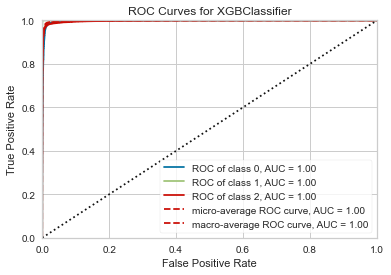

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
model_XGB = XGBClassifier(colsample_bytree = 0.8, gamma = 0.5, learning_rate = 0.16293509938020737, max_depth = 10, min_child_weight = 10, n_estimators = 112, subsample = 0.8)
visualizer_XGB = ROCAUC(model_XGB, classes= ['0', '1', '2'])
visualizer_XGB.fit(x_train, y_train)        
visualizer_XGB.score(x_test, y_test)        
visualizer_XGB.show() 

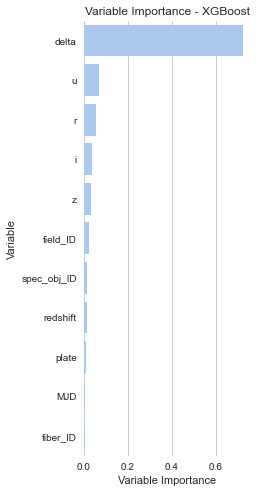

In [50]:
importances = model_XGB.feature_importances_
indices = np.argsort(importances)[::-1] 
f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoost")
sns.set_color_codes("pastel")
sns.barplot(y=['delta','u','r','i','z','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'],x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

## Extratrees





In [82]:
#record time and memory
tracemalloc.start()
t = time()
max_depth = [int(x) for x in np.linspace(10,100 ,num = 10)]
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,4]
max_features = ['auto','sqrt']
criterion  =  ['entropy', 'gini']
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num  = 10)]

rf_params = {
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf' :min_samples_leaf,
    'max_features' :max_features,
    'n_estimators' :n_estimators,
}
n_iter_search = 10
clf =  ExtraTreesClassifier()
Random = RandomizedSearchCV(clf,param_distributions = rf_params, n_iter = n_iter_search,cv = 5,scoring = 'accuracy')
Random.fit(X_val,y_val)
print ("training time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()
print(Random.best_params_)

training time : 417.505 s
Current memory usage is 0.811852 MB,  Peak was 8.521493 MB
{'n_estimators': 778, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy'}


In [84]:
#record time and memory
tracemalloc.start()
t = time()
ETForest = ExtraTreesClassifier(n_estimators = 778, min_samples_split = 2, min_samples_leaf = 1, max_features =  'auto', max_depth =  60, criterion =  'entropy')
ETForest.fit(x_train,y_train)
print ("fit time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")

tracemalloc.start()
t = time()
pred_etf = ETForest.predict(x_test)
print(classification_report(y_test, pred_etf))
print ("predict time :", round(time()-t, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print("Current memory usage is" ,current / 10**6,"MB,  " "Peak was" ,peak / 10**6,"MB")
tracemalloc.stop()

fit time : 40.306 s
Current memory usage is 11.022972 MB,  Peak was 22.093778 MB
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11846
           1       0.99      1.00      0.99     11975
           2       0.98      0.97      0.98     11846

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667

predict time : 4.607 s
Current memory usage is 11.168335 MB,  Peak was 22.093778 MB


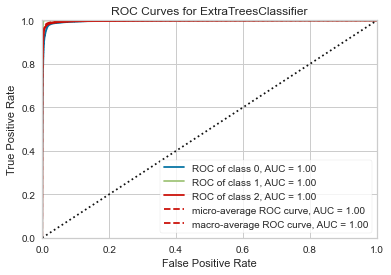

<AxesSubplot:title={'center':'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
ETForest = ExtraTreesClassifier(n_estimators = 778, min_samples_split = 2, min_samples_leaf = 1, max_features =  'auto', max_depth =  60, criterion =  'entropy')
visualizer_ETF = ROCAUC(modelETF, classes= ['0', '1', '2'])
visualizer_ETF.fit(x_train, y_train)        
visualizer_ETF.score(x_test, y_test)        
visualizer_ETF.show() 

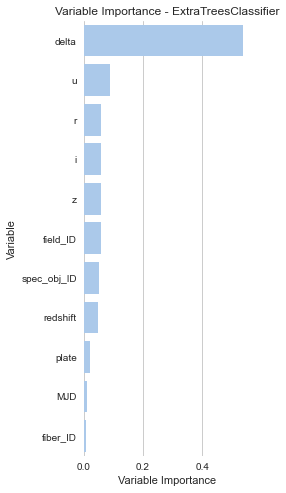

In [86]:
importances = modelETF.feature_importances_
indices = np.argsort(importances)[::-1] 
f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - ExtraTreesClassifier")
sns.set_color_codes("pastel")
sns.barplot(y=['delta','u','r','i','z','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'],x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)